In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# Load your dataset
df = pd.read_csv('/content/drive/MyDrive/pro/res_apart_S.csv')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_in_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
0,S,4 bhk flat for resale in alpha corp gurgaon one,Gurgaon,Sector 84,Alpha Corp GurgaonOne 84,Freehold,4.0,4.0,Semifurnished,North,5-10 Year Old Property,14,26,3434,8766,263.0,1.0,28.406534,76.962792,10.0,0,1,0,2,1,4,0,82.0
1,S,"Explore dlf ultima, an upscale ready-To-Move h...",Gurgaon,Sector 81,DLF The Ultima,Freehold,4.0,3.0,Semifurnished,North,1-5 Year Old Property,7,29,2870,21176,360.0,1.0,28.388907,76.951328,9.0,5,1,0,2,0,1,0,112.0
2,S,Looking for a 3 bhk property for purchase in g...,Gurgaon,Sector 112,Experion Windchants,Freehold,3.0,3.0,Semifurnished,NaN,1-5 Year Old Property,14,28,2802,13740,385.0,1.0,28.518677,77.015115,8.0,3,2,0,2,0,1,0,89.0
3,S,Ats triumph is one of gurgaon's most sought af...,Gurgaon,Sector 104,ATS Triumph,Freehold,3.0,4.0,Semifurnished,South,1-5 Year Old Property,4,27,2290,8515,195.0,1.0,28.478440,76.986110,14.0,5,1,0,3,0,1,1,75.0
4,S,Check out this 2 bhk apartment for sale in m3m...,Gurgaon,Sector 74,M3M Skywalk,Freehold,2.0,3.0,Unfurnished,East,0-1 Year Old Property,12,30,1400,11571,162.0,1.0,28.416400,77.012620,13.0,4,1,0,2,0,1,1,52.0


In [ ]:
df.shape

(21922, 28)

In [ ]:
df.columns

Index(['preference', 'description', 'city', 'locality', 'prop_name',
       'own_type', '#bedroom', '#balcony', 'furnish', 'facing',
       'possesion_age', 'floor_num', '#floors', 'area_in_sqft',
       'price_in_sqft', 'price_in_lakh', 'transaction_type', 'latitude',
       'longitude', 'total_landmark_count', 'connectivity',
       'hospital+pharmacy', 'religious_places', 'education', 'banks',
       'shoppings', 'office_complexes', 'luxury_score'],
      dtype='object')

# **Price_in_lakh**

<Axes: xlabel='price_in_lakh', ylabel='Count'>

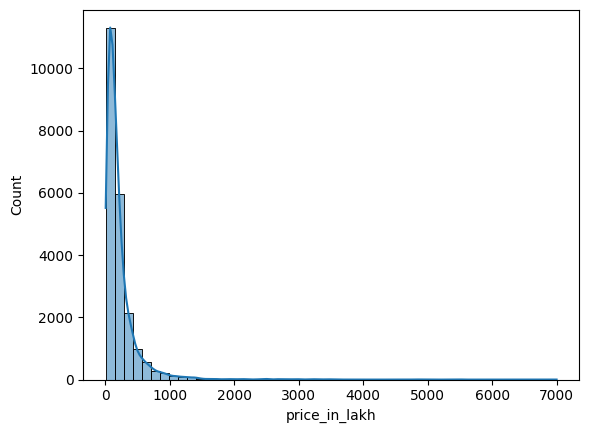

In [ ]:
# outliers on the basis of price column
sns.histplot(df['price_in_lakh'],bins=50,kde=True)

<Axes: xlabel='price_in_lakh'>

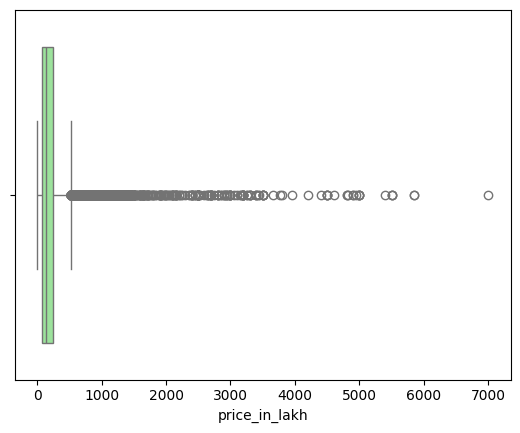

In [ ]:
sns.boxplot(x=df['price_in_lakh'],color='lightgreen')

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['price_in_lakh'].quantile(0.25)
Q3 = df['price_in_lakh'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['price_in_lakh'] < lower_bound) | (df['price_in_lakh'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers.shape[0]
outliers_price_stats = outliers['price_in_lakh'].describe()

num_outliers, outliers_price_stats

(1767,
 count    1767.000000
 mean      996.092247
 std       733.456766
 min       521.000000
 25%       606.000000
 50%       750.000000
 75%      1050.000000
 max      7000.000000
 Name: price_in_lakh, dtype: float64)

In [ ]:
outliers.sort_values('price_in_lakh',ascending=False).head(20)

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_in_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
11527,S,Provenance four seasons private residences is ...,South Mumbai,Worli,Provenance Four Seasons Private Residences,Freehold,6.0,4.0,Unfurnished,NaN,1-5 Year Old Property,51,55,6500,107692,7000.0,1.0,19.016667,72.816667,50.0,1,21,1,0,1,0,0,51.0
10711,S,Birla Niyaara is an under construction project...,South Mumbai,Worli,Birla Niyaara,Freehold,6.0,NaN,NaN,NaN,Under Construction,1,80,7031,84654,5848.0,2.0,19.006484,72.822315,8.0,4,1,0,2,0,1,0,NaN
11042,S,Experience a new style of living with Birla Ni...,South Mumbai,Worli,Birla Niyaara,Freehold,6.0,NaN,NaN,NaN,Under Construction,1,80,7031,84654,5848.0,2.0,19.006484,72.822315,8.0,4,1,0,2,0,1,0,NaN
3172,S,This apartment is located in the best tower in...,Gurgaon,Sector 42,DLF The Camellias,Freehold,4.0,4.0,Furnished,North,0-1 Year Old Property,36,38,7400,74324,5500.0,1.0,28.458598,77.108078,15.0,4,2,0,2,2,1,2,145.0
3402,S,"Dlf the camellias in sector 42, gurgaon. These...",Gurgaon,Sector 42,DLF The Camellias,Freehold,4.0,4.0,Semifurnished,North-East,5-10 Year Old Property,7,38,7400,74324,5500.0,1.0,28.458598,77.108078,15.0,4,2,0,2,2,1,2,132.0
1241,S,"For sale - Penthouse, in dlf - The magnolias, ...",Gurgaon,Sector 42,DLF The Magnolias,Freehold,5.0,4.0,Semifurnished,North-East,1-5 Year Old Property,25,25,11500,43478,5500.0,1.0,28.453820,77.099560,15.0,4,4,0,3,1,0,0,133.0
4722,S,"Situated in sector 106 gurgaon, elan sector 10...",Gurgaon,Sector 106,ELAN SECTOR 106,Freehold,4.0,4.0,Semifurnished,East,Under Construction,20,35,3395,159057,5400.0,1.0,28.503300,76.997430,11.0,0,8,0,0,0,0,0,101.0
12323,S,"Flat no a 3001 & b-3001 3th floor , lodha altm...",South Mumbai,Gowalia Tank,Lodha Altamount,Freehold,5.0,2.0,Semifurnished,South,5-10 Year Old Property,30,40,4149,120510,5000.0,1.0,18.968272,72.810486,3.0,1,1,0,0,0,1,0,49.0
5467,S,Dlf magnolias. Penthouse. 5 bhk for sale. Plea...,Gurgaon,Sector 42,DLF The Magnolias,Freehold,5.0,4.0,Semifurnished,NaN,5-10 Year Old Property,23,23,10800,46296,5000.0,1.0,28.453820,77.099560,15.0,4,4,0,3,1,0,0,118.0
5470,S,Available for sale dlf camellias. Fully furnis...,Gurgaon,Sector 42,DLF The Camellias,Freehold,4.0,4.0,Furnished,North-East,0-1 Year Old Property,3,39,7800,53835,5000.0,1.0,28.458598,77.108078,15.0,4,2,0,2,2,1,2,91.0


pehle area * price in sqft dekh k nikalunga,
jada nan hoga tho nikal dunga

# **Price_per_sqft**

In [ ]:
df.rename(columns={'price_in_sqft':'price_per_sqft'},inplace=True)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

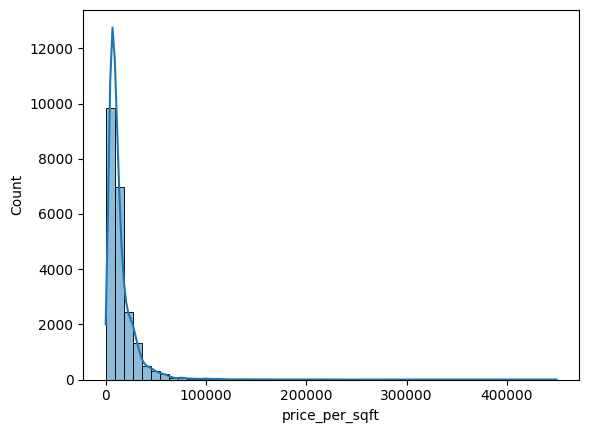

In [ ]:
sns.histplot(df['price_per_sqft'],bins=50,kde=True)

<Axes: xlabel='price_per_sqft'>

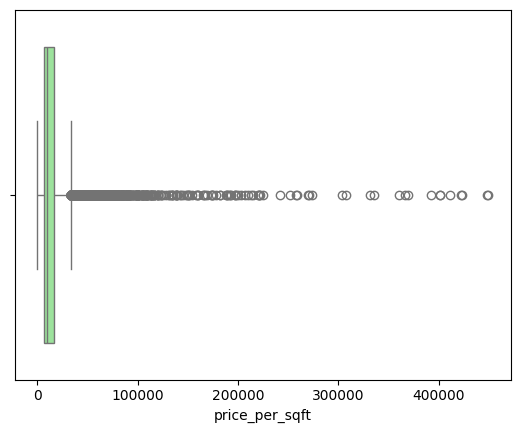

In [ ]:
sns.boxplot(x=df['price_per_sqft'],color='lightgreen')

In [ ]:
# Calculate the IQR for the 'price' column
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers_sqft = df[(df['price_per_sqft'] < lower_bound) | (df['price_per_sqft'] > upper_bound)]

# Displaying the number of outliers and some statistics
num_outliers = outliers_sqft.shape[0]
outliers_sqft_stats = outliers_sqft['price_per_sqft'].describe()

num_outliers, outliers_sqft_stats

(1411,
 count      1411.000000
 mean      47445.523033
 std       15786.719067
 min       33254.000000
 25%       36971.500000
 50%       43528.000000
 75%       52943.000000
 max      258824.000000
 Name: price_per_sqft, dtype: float64)

In [ ]:
outliers_sqft['check'] = (outliers_sqft['price_in_lakh']*100000)/outliers_sqft['price_per_sqft']

<ipython-input-38-ce4152dc87fc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['check'] = (outliers_sqft['price_in_lakh']*100000)/outliers_sqft['price_per_sqft']


In [ ]:
outliers_sqft.to_csv('outliers_sqft.csv')

In [ ]:
outliers_sqft[['city','area_in_sqft']].sample(5)

,city,area_in_sqft
9422,Central Mumbai suburbs,1315
10789,South Mumbai,1875
10732,Central Mumbai suburbs,689
7375,Central Mumbai suburbs,1715
10637,Mumbai Harbour,1800


In [ ]:
outliers_sqft.loc[(outliers_sqft['city'] == '	Central Mumbai suburbs') & (outliers_sqft['#bedroom'] == 4), 'area_in_sqft'] = outliers_sqft.loc[(outliers_sqft['city'] == '	Central Mumbai suburbs') & (outliers_sqft['#bedroom'] == 4), 'area_in_sqft'].apply(lambda x: 1500 if x < 1500 else x)


In [ ]:
outliers_sqft['price_per_sqft'] = round((outliers_sqft['price_in_lakh']*100000)/outliers_sqft['area_in_sqft'])

<ipython-input-122-0268ee63aa54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_sqft['price_per_sqft'] = round((outliers_sqft['price_in_lakh']*100000)/outliers_sqft['area_in_sqft'])


In [ ]:
outliers_sqft['price_per_sqft'].describe()

count      1411.000000
mean      46676.392629
std       16069.689753
min       16650.000000
25%       35714.000000
50%       42571.000000
75%       52299.500000
max      258824.000000
Name: price_per_sqft, dtype: float64

In [ ]:
df.update(outliers_sqft)

<Axes: xlabel='price_per_sqft', ylabel='Count'>

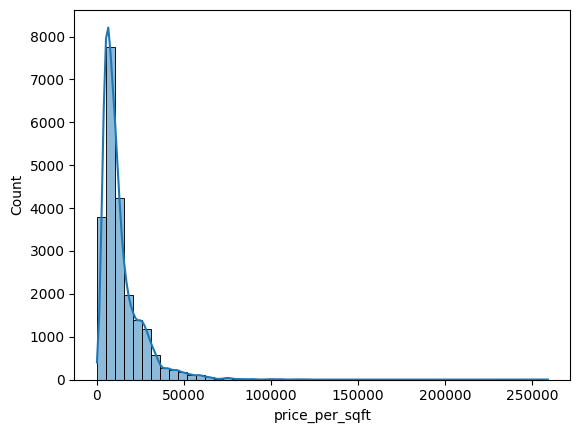

In [ ]:
sns.histplot(df['price_per_sqft'],bins=50,kde=True)

<Axes: xlabel='price_per_sqft'>

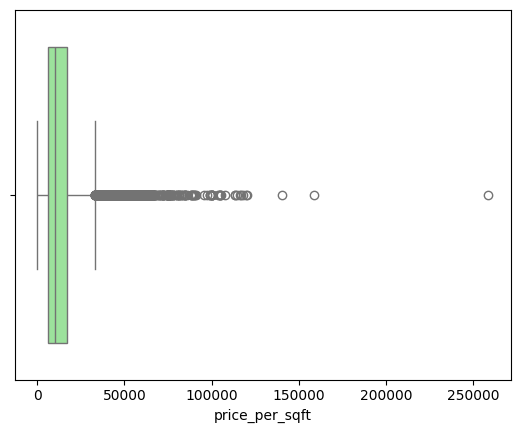

In [ ]:
sns.boxplot(x=df['price_per_sqft'],color='lightgreen')

In [ ]:
df.shape

(21922, 28)

In [ ]:
temp = df[(df['price_per_sqft']>50000) & (df['possesion_age']=='Under Construction')]

In [ ]:
df.drop(temp.index,axis=0,inplace=True)

In [ ]:
df.price_per_sqft.describe()

count     21688.000000
mean      13178.379703
std       10366.165919
min          93.000000
25%        6125.500000
50%        9900.000000
75%       16610.000000
max      120511.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft'>

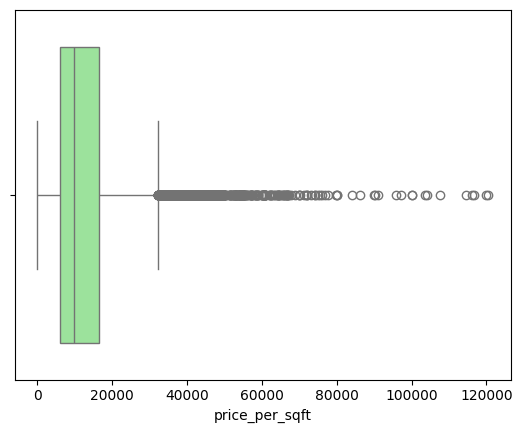

In [ ]:
sns.boxplot(x=df['price_per_sqft'],color='lightgreen')

# **Area_in_sqft**

<Axes: xlabel='area_in_sqft', ylabel='Count'>

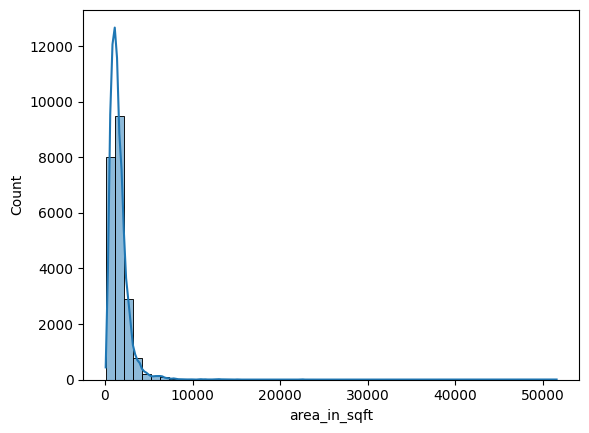

In [ ]:
sns.histplot(df['area_in_sqft'],bins=50,kde=True)

<Axes: xlabel='area_in_sqft'>

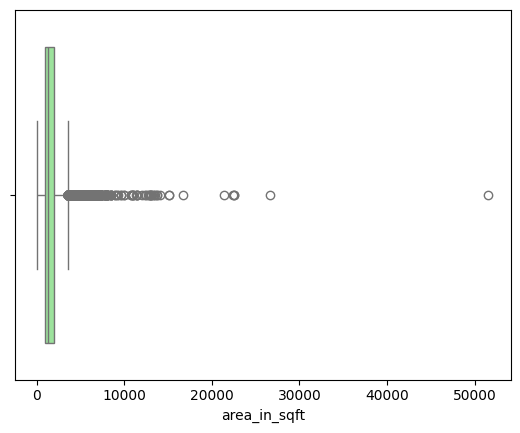

In [ ]:
sns.boxplot(x=df['area_in_sqft'],color='lightgreen')

In [ ]:
df['area_in_sqft'].describe()

count    21688.000000
mean      1583.740133
std       1167.776486
min         90.000000
25%        900.000000
50%       1337.000000
75%       1950.000000
max      51557.000000
Name: area_in_sqft, dtype: float64

In [ ]:
df[df['area_in_sqft'] > 20000]

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
696,S,"It's a duplex house 4 bhk with servant, renova...",Gurgaon,Sector 49,Vatika City,Freehold,4.0,3.0,Semifurnished,North-East,5-10 Year Old Property,4,17,26602,1127,300.0,1.0,28.409196,77.047811,15.0,0,5,0,0,5,0,0,117.0
2179,S,Check out this 2 bhk apartment for sale in pyr...,Gurgaon,Sector 86,Pyramid Urban Homes 2,Freehold,2.0,2.0,Semifurnished,South-East,1-5 Year Old Property,10,13,51557,93,48.0,1.0,28.396872,76.948601,7.0,3,1,0,2,0,1,0,51.0
3716,S,Check out this 4 bhk apartment for sale in ada...,Gurgaon,Sector 63,Adani Brahma Samsara Vilasa,Freehold,4.0,4.0,Furnished,North-East,Under Construction,4,4,22500,16800,420.0,1.0,28.397145,77.086665,13.0,4,1,0,2,0,1,1,51.0
6169,S,"Puri emerald bay sector 104 has 6 towers, *spr...",Gurgaon,Sector 104,Puri Emerald Bay,Freehold,3.0,4.0,Semifurnished,East,1-5 Year Old Property,15,29,22450,1363,306.0,1.0,28.482289,76.991786,14.0,5,1,0,3,0,1,1,147.0
19933,S,This lovely 3 bhk apartment/flat in gopanpally...,Hyderabad,Gopanpally,Vajram Ixora,Freehold,3.0,3.0,Unfurnished,East,Under Construction,12,17,22550,6500,136.0,1.0,17.452690,78.309690,10.0,4,1,0,2,0,1,1,139.0
19949,S,This lovely 3 bhk apartment/flat in gopanpally...,Hyderabad,Gopanpally,Vajram Ixora,Freehold,3.0,1.0,Unfurnished,East,Under Construction,8,17,21420,6500,129.0,1.0,17.452690,78.309690,10.0,4,1,0,2,0,1,1,139.0


In [ ]:
df = df[df['area_in_sqft'] < 30000]

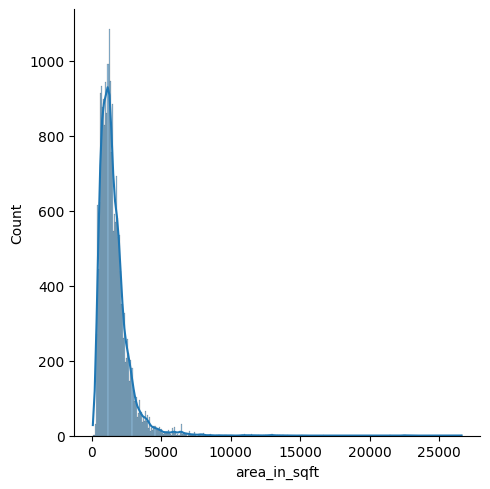

In [ ]:
sns.displot(df['area_in_sqft'], kde=True)

<Axes: xlabel='area_in_sqft'>

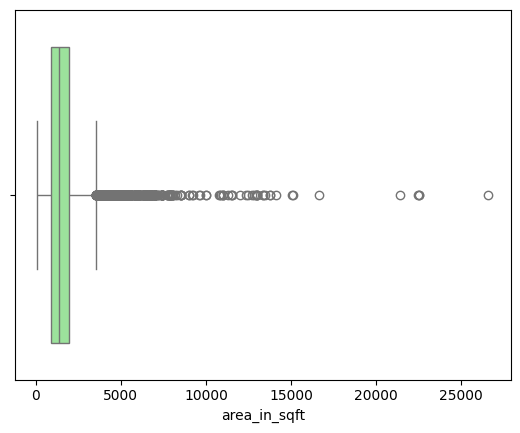

In [ ]:
sns.boxplot(x=df['area_in_sqft'],color='lightgreen')

In [ ]:
df[df['area_in_sqft'] > 10000].sort_values('area_in_sqft',ascending=False)

# 19949,12492,19045,15461,21099,21036,11678.10813,10604

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
696,S,"It's a duplex house 4 bhk with servant, renova...",Gurgaon,Sector 49,Vatika City,Freehold,4.0,3.0,Semifurnished,North-East,5-10 Year Old Property,4,17,26602,1127,300.00,1.0,28.409196,77.047811,15.0,0,5,0,0,5,0,0,117.0
19933,S,This lovely 3 bhk apartment/flat in gopanpally...,Hyderabad,Gopanpally,Vajram Ixora,Freehold,3.0,3.0,Unfurnished,East,Under Construction,12,17,22550,6500,136.00,1.0,17.452690,78.309690,10.0,4,1,0,2,0,1,1,139.0
3716,S,Check out this 4 bhk apartment for sale in ada...,Gurgaon,Sector 63,Adani Brahma Samsara Vilasa,Freehold,4.0,4.0,Furnished,North-East,Under Construction,4,4,22500,16800,420.00,1.0,28.397145,77.086665,13.0,4,1,0,2,0,1,1,51.0
6169,S,"Puri emerald bay sector 104 has 6 towers, *spr...",Gurgaon,Sector 104,Puri Emerald Bay,Freehold,3.0,4.0,Semifurnished,East,1-5 Year Old Property,15,29,22450,1363,306.00,1.0,28.482289,76.991786,14.0,5,1,0,3,0,1,1,147.0
19949,S,This lovely 3 bhk apartment/flat in gopanpally...,Hyderabad,Gopanpally,Vajram Ixora,Freehold,3.0,1.0,Unfurnished,East,Under Construction,8,17,21420,6500,129.00,1.0,17.452690,78.309690,10.0,4,1,0,2,0,1,1,139.0
5303,S,This 3 bhk flat is located in shapoorji pallon...,Gurgaon,Sector 102,Shapoorji Pallonji Joyville Gurugram,Freehold,3.0,4.0,Furnished,North-East,1-5 Year Old Property,7,26,16668,10907,202.00,1.0,28.479277,76.976095,10.0,3,1,0,2,0,1,1,134.0
6060,S,Ntroducing a house that has been meticulously ...,Gurgaon,Sector-33 Sohna,Godrej Nature Plus Serenity,Freehold,2.0,4.0,Semifurnished,NaN,Under Construction,15,24,15123,11142,117.00,1.0,28.280130,77.066960,6.0,1,0,0,2,0,1,0,23.0
12492,S,Available elegant apartment for sale in a prim...,South Mumbai,Parel,Ruparel Ariana,Freehold,2.0,0.0,Semifurnished,North-East,1-5 Year Old Property,54,73,15069,1759,265.00,1.0,19.004640,72.849580,8.0,4,1,0,2,0,1,0,104.0
19587,S,Ultra luxurious sky mansions in the heart of t...,Hyderabad,Khajaguda,Manhattan Views Khajaguda,Freehold,5.0,4.0,Unfurnished,East,Under Construction,29,50,14099,9220,1300.00,1.0,17.412140,78.364310,48.0,0,12,6,0,3,0,2,147.0
19045,S,Newly constructed project \nAll are 3 bhk \nPo...,Secunderabad,ECIL,Nysha By Airaa Structures,Freehold,3.0,1.0,Unfurnished,East,Under Construction,1,5,13770,4800,73.44,1.0,17.463085,78.569989,49.0,0,15,10,0,2,1,0,22.0


In [ ]:
df.drop(index=[19949,12492,19045,15461,21099,21036,11678,10813,10604], inplace=True)

<ipython-input-157-8b4466402902>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=[19949,12492,19045,15461,21099,21036,11678,10813,10604], inplace=True)


In [ ]:
df[df['area_in_sqft'] > 10000].sort_values('area_in_sqft',ascending=False)

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
696,S,"It's a duplex house 4 bhk with servant, renova...",Gurgaon,Sector 49,Vatika City,Freehold,4.0,3.0,Semifurnished,North-East,5-10 Year Old Property,4,17,26602,1127,300.0,1.0,28.409196,77.047811,15.0,0,5,0,0,5,0,0,117.0
19933,S,This lovely 3 bhk apartment/flat in gopanpally...,Hyderabad,Gopanpally,Vajram Ixora,Freehold,3.0,3.0,Unfurnished,East,Under Construction,12,17,22550,6500,136.0,1.0,17.452690,78.309690,10.0,4,1,0,2,0,1,1,139.0
3716,S,Check out this 4 bhk apartment for sale in ada...,Gurgaon,Sector 63,Adani Brahma Samsara Vilasa,Freehold,4.0,4.0,Furnished,North-East,Under Construction,4,4,22500,16800,420.0,1.0,28.397145,77.086665,13.0,4,1,0,2,0,1,1,51.0
6169,S,"Puri emerald bay sector 104 has 6 towers, *spr...",Gurgaon,Sector 104,Puri Emerald Bay,Freehold,3.0,4.0,Semifurnished,East,1-5 Year Old Property,15,29,22450,1363,306.0,1.0,28.482289,76.991786,14.0,5,1,0,3,0,1,1,147.0
5303,S,This 3 bhk flat is located in shapoorji pallon...,Gurgaon,Sector 102,Shapoorji Pallonji Joyville Gurugram,Freehold,3.0,4.0,Furnished,North-East,1-5 Year Old Property,7,26,16668,10907,202.0,1.0,28.479277,76.976095,10.0,3,1,0,2,0,1,1,134.0
6060,S,Ntroducing a house that has been meticulously ...,Gurgaon,Sector-33 Sohna,Godrej Nature Plus Serenity,Freehold,2.0,4.0,Semifurnished,NaN,Under Construction,15,24,15123,11142,117.0,1.0,28.280130,77.066960,6.0,1,0,0,2,0,1,0,23.0
19587,S,Ultra luxurious sky mansions in the heart of t...,Hyderabad,Khajaguda,Manhattan Views Khajaguda,Freehold,5.0,4.0,Unfurnished,East,Under Construction,29,50,14099,9220,1300.0,1.0,17.412140,78.364310,48.0,0,12,6,0,3,0,2,147.0
9456,S,This 5 bhk apartment is available for sale in ...,Mumbai Andheri-Dahisar,Andheri West,Atlantis Apartment,Freehold,5.0,4.0,Unfurnished,South,10+ Year Old Property,16,28,13750,20364,2800.0,1.0,19.123645,72.878704,48.0,4,25,3,0,0,0,2,67.0
3664,S,This one duplex luxury penthouse \nAmbience ca...,Gurgaon,DLF Phase 3,Ambience Caitriona,Freehold,5.0,4.0,Semifurnished,North-East,0-1 Year Old Property,11,11,13500,20909,2300.0,1.0,28.502590,77.100084,15.0,2,3,0,1,3,2,2,147.0
5336,S,Looking for a 5 bhk property for sale in gurga...,Gurgaon,Sector 65,M3M Golfestate,Freehold,5.0,3.0,Semifurnished,North-East,1-5 Year Old Property,27,40,13345,11240,1500.0,1.0,28.401137,77.064929,9.0,4,1,0,2,0,1,0,84.0


<Axes: xlabel='area_in_sqft'>

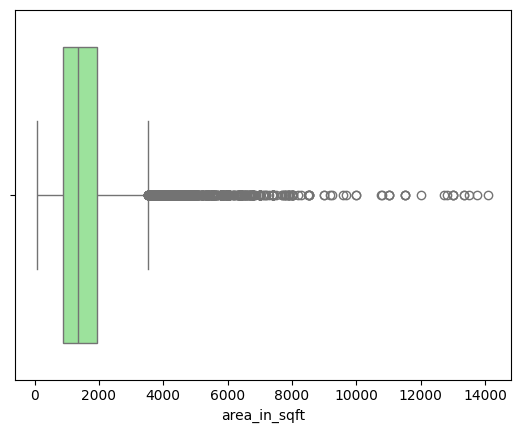

In [ ]:
sns.boxplot(x=df['area_in_sqft'],color='lightgreen')

In [ ]:
df['area_in_sqft'].describe()

count    21672.000000
mean      1571.037468
std       1037.495201
min         90.000000
25%        900.000000
50%       1336.000000
75%       1950.000000
max      14099.000000
Name: area_in_sqft, dtype: float64

# **BedRoom**

<Axes: xlabel='#bedroom', ylabel='Count'>

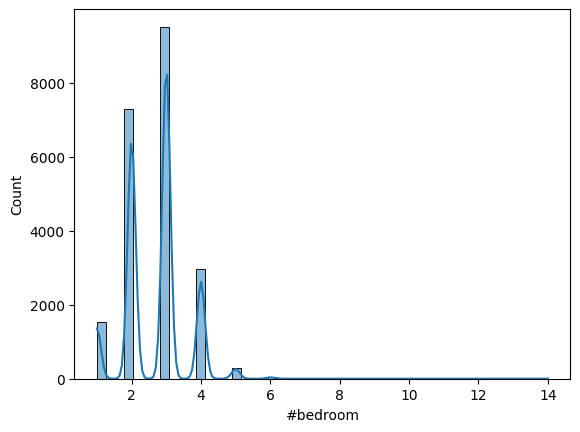

In [ ]:
sns.histplot(df['#bedroom'], kde=True, bins=50)

<Axes: xlabel='#bedroom'>

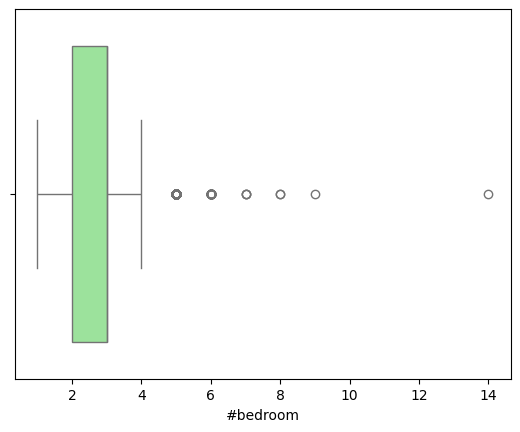

In [ ]:
sns.boxplot(x=df['#bedroom'],color='lightgreen')

In [ ]:
df['#bedroom'].describe()

count    21660.000000
mean         2.692844
std          0.864618
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         14.000000
Name: #bedroom, dtype: float64

In [ ]:
df[df['#bedroom'] > 6].sort_values('#bedroom',ascending=False)

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,transaction_type,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
15444,S,"This beautiful 9 bhk flat in new alipore, kolk...",Kolkata South,New Alipore,New Alipore,Freehold,9.0,4.0,Unfurnished,South,10+ Year Old Property,2,2,2500,3520,88.0,1.0,22.501180,88.333934,50.0,2,22,4,0,4,1,0,8.0
4523,S,Salcon the verandas is one of the most popular...,Gurgaon,Sector 54,Salcon The Verandas,Freehold,8.0,4.0,Semifurnished,North-East,5-10 Year Old Property,16,16,12000,12916,1550.0,1.0,28.443971,77.111121,15.0,1,1,1,2,3,3,2,51.0
11799,S,Nice residential property in the prime locatio...,Mumbai Andheri-Dahisar,Chakala,M D Globus Express Enclave,Freehold,8.0,0.0,Semifurnished,North,1-5 Year Old Property,7,12,5000,23980,1199.0,1.0,19.112117,72.856883,48.0,1,14,3,0,3,0,0,67.0
10676,S,Let your dream of owning a flat come true with...,Navi Mumbai,Vashi,Arihant Aleenta,Freehold,7.0,NaN,NaN,NaN,Under Construction,1,29,7862,23234,1827.0,2.0,19.075185,72.997976,6.0,2,0,0,0,0,2,0,NaN
12370,S,"6 bhk spacious well done up flat, freehold wit...",Mumbai South West,Juhu Circle,On Request,Freehold,7.0,0.0,Unfurnished,NaN,10+ Year Old Property,7,7,3156,33270,1050.0,1.0,19.116109,72.829827,50.0,0,16,6,0,1,0,0,95.0
14416,S,This 7bhk house is just 4 yrs old .. It's loca...,Kolkata North,Panihati,Maya Kutir Sodepur,Freehold,7.0,3.0,Semifurnished,East,5-10 Year Old Property,1,1,2310,4761,110.0,1.0,22.696664,88.371270,24.0,1,16,1,0,0,0,0,6.0


In [ ]:
df = df[df['#bedroom'] <= 10]

In [ ]:
df.shape

(21659, 28)

<Axes: xlabel='#bedroom'>

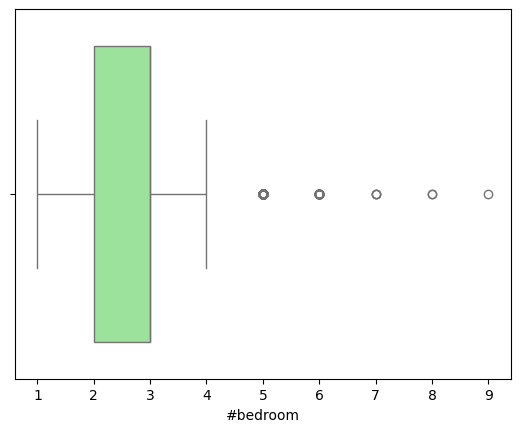

In [ ]:
sns.boxplot(x=df['#bedroom'],color='lightgreen')

In [ ]:
df['#bedroom'].describe()

count    21659.000000
mean         2.692322
std          0.861217
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max          9.000000
Name: #bedroom, dtype: float64

# **Balcony**

<Axes: xlabel='#balcony', ylabel='Count'>

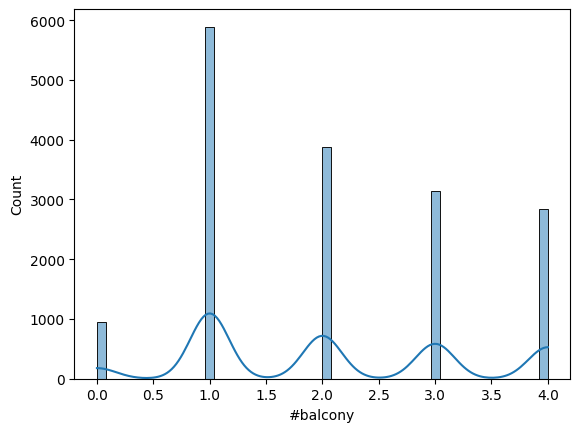

In [ ]:
sns.histplot(df['#balcony'], kde=True, bins=50)

<Axes: xlabel='#balcony'>

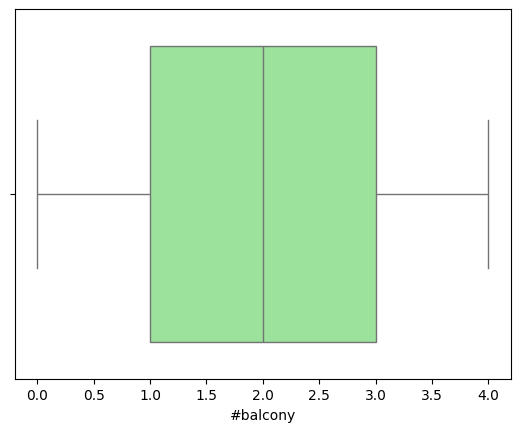

In [ ]:
sns.boxplot(x=df['#balcony'],color='lightgreen')

# **Area_per_sqft**

<Axes: xlabel='area_in_sqft', ylabel='Count'>

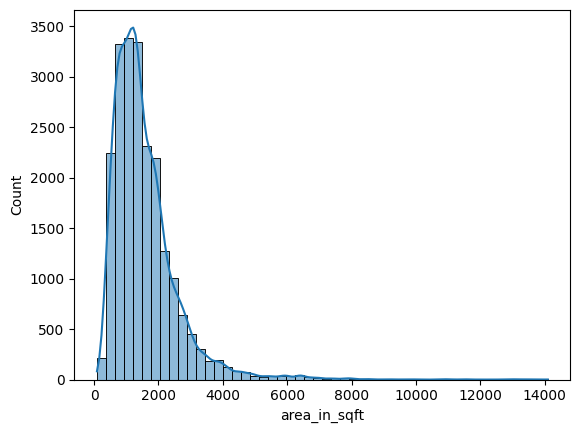

In [ ]:
sns.histplot(df['area_in_sqft'], kde=True, bins=50)

<Axes: xlabel='area_in_sqft'>

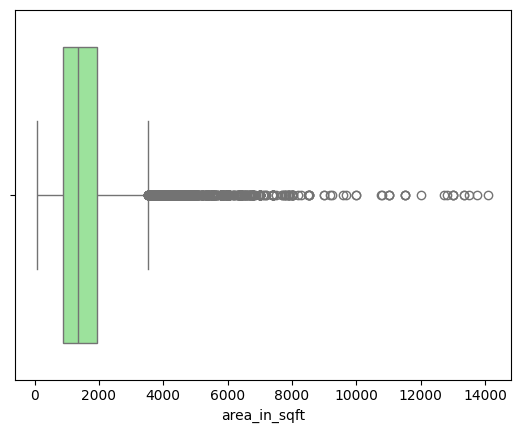

In [ ]:
sns.boxplot(x=df['area_in_sqft'],color='lightgreen')

In [ ]:
df['area_in_sqft'].describe()

count    21659.000000
mean      1570.895932
std       1037.029867
min         90.000000
25%        900.000000
50%       1336.000000
75%       1950.000000
max      14099.000000
Name: area_in_sqft, dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21659 entries, 0 to 21921
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   preference            21659 non-null  object 
 1   description           21659 non-null  object 
 2   city                  21659 non-null  object 
 3   locality              21656 non-null  object 
 4   prop_name             21659 non-null  object 
 5   own_type              21659 non-null  object 
 6   #bedroom              21659 non-null  float64
 7   #balcony              16714 non-null  float64
 8   furnish               16034 non-null  object 
 9   facing                14707 non-null  object 
 10  possesion_age         21656 non-null  object 
 11  floor_num             21659 non-null  int64  
 12  #floors               21659 non-null  int64  
 13  area_in_sqft          21659 non-null  int64  
 14  price_per_sqft        21659 non-null  int64  
 15  price_in_lakh         21

In [ ]:
df.drop(columns=['transaction_type'],inplace=True)

# **Luxury_Scsacczaaaaa**

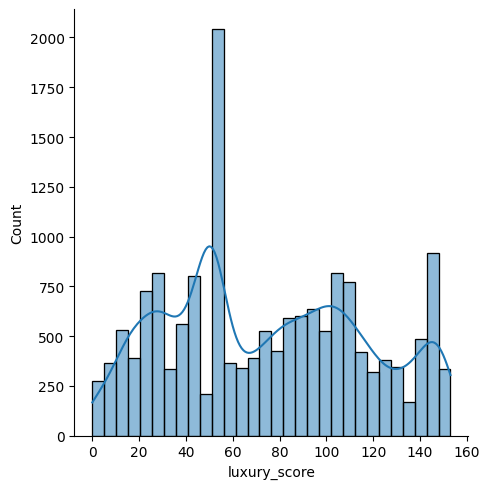

In [ ]:
sns.displot(df['luxury_score'],kde=True)

<Axes: xlabel='luxury_score'>

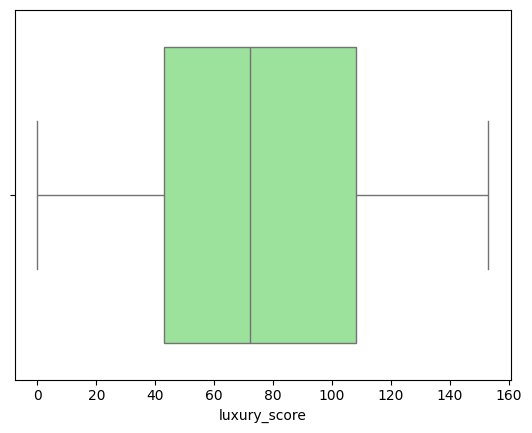

In [ ]:
sns.boxplot(x=df['luxury_score'],color='lightgreen')

In [ ]:
df.head()

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
0,S,4 bhk flat for resale in alpha corp gurgaon one,Gurgaon,Sector 84,Alpha Corp GurgaonOne 84,Freehold,4.0,4.0,Semifurnished,North,5-10 Year Old Property,14,26,3434,8766,263.0,28.406534,76.962792,10.0,0,1,0,2,1,4,0,82.0
1,S,"Explore dlf ultima, an upscale ready-To-Move h...",Gurgaon,Sector 81,DLF The Ultima,Freehold,4.0,3.0,Semifurnished,North,1-5 Year Old Property,7,29,2870,21176,360.0,28.388907,76.951328,9.0,5,1,0,2,0,1,0,112.0
2,S,Looking for a 3 bhk property for purchase in g...,Gurgaon,Sector 112,Experion Windchants,Freehold,3.0,3.0,Semifurnished,NaN,1-5 Year Old Property,14,28,2802,13740,385.0,28.518677,77.015115,8.0,3,2,0,2,0,1,0,89.0
3,S,Ats triumph is one of gurgaon's most sought af...,Gurgaon,Sector 104,ATS Triumph,Freehold,3.0,4.0,Semifurnished,South,1-5 Year Old Property,4,27,2290,8515,195.0,28.478440,76.986110,14.0,5,1,0,3,0,1,1,75.0
4,S,Check out this 2 bhk apartment for sale in m3m...,Gurgaon,Sector 74,M3M Skywalk,Freehold,2.0,3.0,Unfurnished,East,0-1 Year Old Property,12,30,1400,11571,162.0,28.416400,77.012620,13.0,4,1,0,2,0,1,1,52.0


<Axes: xlabel='price_per_sqft'>

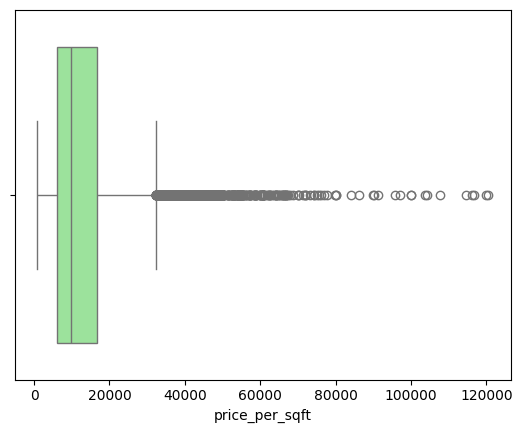

In [194]:
sns.boxplot(x=df['price_per_sqft'],color='lightgreen')

In [199]:
x = df[df['price_per_sqft'] <= 30000]
(x['area_in_sqft']/(x['#bedroom']+x['#balcony'])).quantile(0.02)

155.75

In [193]:
df.to_csv('/content/drive/MyDrive/pro/res_apart_S2.csv')

In [201]:
df[(df['area_in_sqft']/(df['#bedroom']+df['#balcony']))<155]

,preference,description,city,locality,prop_name,own_type,#bedroom,#balcony,furnish,facing,possesion_age,floor_num,#floors,area_in_sqft,price_per_sqft,price_in_lakh,latitude,longitude,total_landmark_count,connectivity,hospital+pharmacy,religious_places,education,banks,shoppings,office_complexes,luxury_score
142,S,Looking for a 3 bhk property for sale in gurga...,Gurgaon,Sector 88A,Breez Global Heights 88A,Freehold,3.0,3.0,Semifurnished,East,Under Construction,5,19,749,6542,49.00,28.433180,76.954380,9.0,4,1,0,2,0,2,0,105.0
154,S,Looking for a 2 bhk property for sale in gurga...,Gurgaon,Sector-4 Sohna,GLS Arawali Homes,Freehold,2.0,2.0,Unfurnished,North,1-5 Year Old Property,9,13,468,5448,25.50,28.257718,77.079001,2.0,0,2,0,0,0,0,0,58.0
155,S,"This beautiful 2 bhk flat in sector 36 sohna, ...",Gurgaon,Sector 36 Sohna,Signature The Serenas,Freehold,2.0,2.0,Unfurnished,North,0-1 Year Old Property,6,14,531,7532,40.00,28.287996,77.064602,NaN,0,0,0,0,0,0,0,82.0
157,S,"Situated in sector-33 sohna, gurgaon, breez gl...",Gurgaon,Sector-33 Sohna,Breez Global Heights,Freehold,2.0,2.0,Unfurnished,North,1-5 Year Old Property,7,10,609,6639,40.50,28.288782,77.067725,NaN,0,0,0,0,0,0,0,104.0
182,S,This 3 bhk apartment is available for sale in ...,Gurgaon,Sector 88A,Godrej Oasis,Freehold,3.0,4.0,Semifurnished,East,1-5 Year Old Property,9,17,1084,10608,115.00,28.434808,76.955789,7.0,2,1,0,2,0,1,0,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15537,S,"South facing, corner unit, podium facing, near...",Kolkata East,Rajarhat,The Soul,Freehold,3.0,2.0,Unfurnished,South,Under Construction,3,16,750,10000,75.00,22.553961,88.371041,15.0,5,2,0,4,1,2,0,89.0
15823,S,This 3 bhk apartment is available for sale in ...,Kolkata East,New Town,On Request,Freehold,3.0,2.0,Unfurnished,North,1-5 Year Old Property,2,4,150,57333,86.00,22.571962,88.472480,33.0,3,6,1,0,3,0,3,30.0
17073,S,This project is located at nearby airport 1no ...,Kolkata North,Airport,on request,Freehold,5.0,1.0,Unfurnished,NaN,0-1 Year Old Property,1,4,881,3499,30.83,22.643876,88.425956,39.0,2,23,3,0,3,0,0,NaN
17998,S,Southwinds on southern bypass introduces a new...,Kolkata South,Garia,Southwinds,Freehold,2.0,4.0,Furnished,South,Under Construction,1,18,895,4245,38.00,22.407335,88.413744,3.0,0,1,0,0,0,0,0,112.0


In [202]:
df.shape

(21659, 27)